Importing necessary libraries to read the file, and format the dataset using pandas

In [1]:
from os import listdir
from os.path import isfile, join
from random import shuffle
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
import os, glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Adding the path of dataset uploaded on the drive to the variable path
dataView = pd.read_csv("/content/drive/My Drive/DS/data0.csv")
dataView

,OptimizedValue:1606.0
0,[[156 499 284 25 300 40 346 108 190 458 358 ...
1,449 225 487 54 497 420 207 204 175 423 301 ...
2,345 435 295 443 397 63 35 491 264 113 179 ...
3,[219 400 62 99 34 432 259 315 319 88 378 ...
4,320 418 230 294 334 312 313 121 146 330 131 ...
...,...
145,495 251 464 290 279 330 251 327 319 24 466 ...
146,243 72 68 334 33 79 96 443 387 101 387 ...
147,[ 72 354 129 489 136 101 375 244 282 34 355 ...
148,77 89 366 240 419 225 325 136 214 24 85 ...


Creating a function reformat() that processes the provided data set.

*   Removes the brackets "[", "]"
*   Split the data when " " is encountered


Preprocessing the data set by calling the reformat() and also segregating "OptimizedValue" from the file

In [4]:
# Row 'rowValue' is the argument for the function reformat 
# rowArray is intialised as an array that takes in as input the data after reformatting
def reformat(rowValue):
      list = []

      # data_op = c.split(":")
      rowValue = rowValue.strip(" ] ")
      rowValue = rowValue.strip(" [ ")

      # Reformating the dataset by removing " "
      rowValue = rowValue.split(" ") 

      for string in rowValue:
        if (string != ""):
          # Appending the actual values i.e., time taken by each doctor
          list.append(string) 
      return list


In [5]:
# Creating a for loop for 1000 data files provided
for file_count in range(0,1000):

  # Creating a panda dataframe by reading csv files from the path 
  dataset = pd.read_csv("/content/drive/My Drive/DS/data"+ str(file_count) +".csv")
  columnValue = dataset.columns[0] #initialising the first column
  
  # splitting the value with ":" so that the actual optimized value can be procured
  data_op = columnValue.split(":")
  for optimizedVal in data_op:
    if(optimizedVal != "OptimizedValue"):
      val_data_ann = int(float(optimizedVal))
      val_data_cnn = int(float(optimizedVal))
  
  # creating a list that contains row values i.e., the time taken by each doctor
  list1_ann = []
  list1_cnn = []
  for i in range(0,150):
    arrayData = dataset[columnValue][i]
    reformatvalue = reformat(arrayData)
   
    for i in reformatvalue:
      list1_ann.append(int(i))
      list1_cnn.append(int(i))

  # Creating two lists for ANN and CNN model which will be initailised and used later
  list2_ann=[]
  list2_cnn=[]
  
  list1_ann = [float(i)/sum(list1_ann) for i in list1_ann]
  list2_ann.append(list1_ann)
  list1_cnn = [float(i)/sum(list1_cnn) for i in list1_cnn]
  list2_cnn.append(list1_cnn)

  # df1_ann = pd.DataFrame({"header_data_ann" : list2_ann ,"val_data_ann" : val_data_ann})
  # df1_cnn = pd.DataFrame({"header_data_cnn" : list2_cnn ,"val_data_cnn" : val_data_cnn})
  
  #Creating a condition that enters the optimized value to the val_data and time taken to header_data(list_2)
  if( file_count == 0 ):
    df1_ann = pd.DataFrame({"header_data_ann" : list2_ann ,"val_data_ann" : val_data_ann})
    df1_cnn = pd.DataFrame({"header_data_cnn" : list2_cnn ,"val_data_cnn" : val_data_cnn})
  else:
    df2_ann = pd.DataFrame({"header_data_ann" : list2_ann ,"val_data_ann" : val_data_ann})
    df1_ann = df1_ann.append(df2_ann, ignore_index= True)
    df2_cnn = pd.DataFrame({"header_data_cnn" : list2_cnn ,"val_data_cnn" : val_data_cnn})
    df1_cnn = df1_cnn.append(df2_cnn, ignore_index= True)
  

In [6]:
df1_ann.describe

<bound method NDFrame.describe of                                        header_data_ann  val_data_ann
0    [0.00023981515785525311, 0.0007671010498062263...          1606
1    [0.000132112238783435, 7.234717838140489e-05, ...          1714
2    [0.00010460942992475813, 0.0006153495877926949...          1936
3    [0.0006157502763179365, 0.0002278276022376365,...          1811
4    [4.323997102921941e-05, 0.0004339439949718091,...          1890
..                                                 ...           ...
995  [0.0005424143047744928, 0.0004909784655286357,...          1729
996  [0.0002588882425143226, 0.00029696004288407593...          1819
997  [0.0005328214923364066, 0.0006247409895523365,...          1721
998  [0.0004902576610419814, 0.0007614314298058273,...          1827
999  [0.0007320542030302701, 0.000266765514663573, ...          1744

[1000 rows x 2 columns]>

In [7]:
df1_cnn.describe

<bound method NDFrame.describe of                                        header_data_cnn  val_data_cnn
0    [0.00023981515785525311, 0.0007671010498062263...          1606
1    [0.000132112238783435, 7.234717838140489e-05, ...          1714
2    [0.00010460942992475813, 0.0006153495877926949...          1936
3    [0.0006157502763179365, 0.0002278276022376365,...          1811
4    [4.323997102921941e-05, 0.0004339439949718091,...          1890
..                                                 ...           ...
995  [0.0005424143047744928, 0.0004909784655286357,...          1729
996  [0.0002588882425143226, 0.00029696004288407593...          1819
997  [0.0005328214923364066, 0.0006247409895523365,...          1721
998  [0.0004902576610419814, 0.0007614314298058273,...          1827
999  [0.0007320542030302701, 0.000266765514663573, ...          1744

[1000 rows x 2 columns]>

In [8]:
l1_ann = df1_ann['header_data_ann'].apply(pd.Series)
l1_cnn = df1_cnn['header_data_cnn'].apply(pd.Series)
l1_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.000240,0.000767,0.000437,0.000038,0.000461,0.000061,0.000532,0.000166,0.000292,0.000704,0.000550,0.000492,0.000191,0.000143,0.000435,0.000158,0.000098,0.000420,0.000690,0.000346,0.000749,0.000083,0.000764,0.000646,0.000318,0.000314,0.000269,0.000650,0.000463,0.000031,0.000470,0.000214,0.000544,0.000055,0.000501,0.000121,0.000530,0.000669,0.000453,0.000681,...,0.000546,0.000486,0.000046,0.000363,0.000450,0.000354,0.000315,0.000744,0.000118,0.000137,0.000563,0.000369,0.000644,0.000346,0.000500,0.000209,0.000329,0.000037,0.000131,0.000726,0.000735,0.000723,0.000570,0.000237,0.000630,0.000575,0.000145,0.000607,0.000719,0.000038,0.000484,0.000535,0.000480,0.000646,0.000453,0.000503,0.000105,0.000417,0.000464,0.000072
1,0.000132,0.000072,0.000428,0.000082,0.000517,0.000341,0.000609,0.000168,0.000530,0.000109,0.000313,0.000617,0.000760,0.000241,0.000439,0.000560,0.000506,0.000241,0.000187,0.000157,0.000118,0.000275,0.000318,0.000632,0.000631,0.000670,0.000107,0.000455,0.000532,0.000409,0.000613,0.000035,0.000459,0.000406,0.000546,0.000583,0.000140,0.000041,0.000709,0.000698,...,0.000535,0.000050,0.000445,0.000618,0.000248,0.000264,0.000396,0.000565,0.000228,0.000469,0.000448,0.000664,0.000667,0.000395,0.000118,0.000596,0.000393,0.000338,0.000374,0.000544,0.000211,0.000569,0.000341,0.000632,0.000745,0.000645,0.000415,0.000223,0.000189,0.000247,0.000698,0.000035,0.000656,0.000613,0.000104,0.000392,0.000448,0.000241,0.000777,0.000351
2,0.000105,0.000615,0.000243,0.000545,0.000600,0.000721,0.000712,0.000448,0.000228,0.000368,0.000580,0.000451,0.000060,0.000442,0.000712,0.000735,0.000766,0.000077,0.000318,0.000518,0.000234,0.000503,0.000535,0.000285,0.000308,0.000231,0.000566,0.000689,0.000755,0.000338,0.000637,0.000422,0.000218,0.000577,0.000037,0.000423,0.000465,0.000718,0.000595,0.000252,...,0.000743,0.000174,0.000723,0.000683,0.000378,0.000211,0.000180,0.000362,0.000315,0.000242,0.000100,0.000492,0.000215,0.000635,0.000617,0.000038,0.000323,0.000377,0.000123,0.000646,0.000238,0.000200,0.000471,0.000748,0.000443,0.000475,0.000712,0.000725,0.000397,0.000226,0.000317,0.000106,0.000205,0.000035,0.000755,0.000165,0.000458,0.000357,0.000278,0.000620
3,0.000616,0.000228,0.000037,0.000182,0.000720,0.000528,0.000294,0.000671,0.000285,0.000386,0.000705,0.000112,0.000309,0.000596,0.000249,0.000577,0.000568,0.000342,0.000405,0.000054,0.000702,0.000702,0.000269,0.000659,0.000035,0.000676,0.000322,0.000272,0.000328,0.000519,0.000429,0.000657,0.000222,0.000092,0.000605,0.000526,0.000099,0.000035,0.000688,0.000125,...,0.000468,0.000045,0.000708,0.000657,0.000491,0.000440,0.000366,0.000229,0.000483,0.000656,0.000242,0.000588,0.000682,0.000216,0.000140,0.000653,0.000764,0.000696,0.000724,0.000120,0.000091,0.000168,0.000353,0.000075,0.000727,0.000716,0.000654,0.000188,0.000312,0.000319,0.000094,0.000429,0.000072,0.000140,0.000109,0.000177,0.000095,0.000271,0.000616,0.000700
4,0.000043,0.000434,0.000249,0.000349,0.000103,0.000119,0.000176,0.000335,0.000650,0.000114,0.000757,0.000366,0.000414,0.000471,0.000213,0.000131,0.000059,0.000434,0.000619,0.000587,0.000349,0.000590,0.000080,0.000252,0.000545,0.000599,0.000540,0.000300,0.000065,0.000689,0.000622,0.000531,0.000292,0.000202,0.000561,0.000286,0.000253,0.000449,0.000579,0.000195,...,0.000547,0.000320,0.000176,0.000295,0.000088,0.000462,0.000168,0.000043,0.000479,0.000625,0.000703,0.000666,0.000338,0.000724,0.000411,0.000040,0.000059,0.000652,0.000587,0.000737,0.000491,0.000658,0.000385,0.000244,0.000292,0.000746,0.000737,0.000644,0.000679,0.000032,0.000261,0.000692,0.000381,0.000079,0.000440,0.000250,0.000613,0.000094,0.000578,0.000318
...,...,...,...,...,...,...,...,...,...,...,...,...,...

Importing necessary libraries to:


*   Scale the source dataset
*   split the dataset into test and train
*   create and run the CNN keras model
*   Perform K fold cross validation








In [9]:
from keras.layers import ReLU
import keras
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [10]:
# Splitting the test and train into 30 and 70 ratio
x_train_ann, x_test_ann = train_test_split(l1_ann, train_size = 0.7)
y_train_ann, y_test_ann = train_test_split(df1_ann.val_data_ann, train_size = 0.7)

In [11]:
x_train_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
851,0.000549,0.000737,0.000149,0.000653,0.000561,0.000726,0.000570,0.000532,0.000731,0.000592,0.000496,0.000304,0.000427,0.000570,0.000403,0.000383,0.000134,0.000365,0.000406,0.000744,0.000390,0.000453,0.000387,0.000282,0.000290,0.000297,0.000516,0.000078,0.000381,0.000482,0.000741,0.000133,0.000499,0.000648,0.000183,0.000464,0.000267,0.000511,0.000484,0.000656,...,0.000593,0.000718,0.000662,0.000488,0.000290,0.000734,0.000421,0.000037,0.000477,0.000177,0.000746,0.000351,0.000358,0.000525,0.000220,0.000363,0.000607,0.000737,0.000720,0.000110,0.000750,0.000121,0.000522,0.000641,0.000252,0.000253,0.000282,0.000577,0.000139,0.000642,0.000151,0.000432,0.000287,0.000299,0.000276,0.000354,0.000046,0.000407,0.000368,0.000322
190,0.000247,0.000639,0.000750,0.000607,0.000413,0.000455,0.000118,0.000476,0.000215,0.000332,0.000389,0.000075,0.000713,0.000670,0.000759,0.000129,0.000507,0.000249,0.000049,0.000381,0.000492,0.000330,0.000602,0.000307,0.000326,0.000473,0.000214,0.000599,0.000058,0.000101,0.000294,0.000410,0.000151,0.000473,0.000715,0.000224,0.000292,0.000573,0.000197,0.000719,...,0.000592,0.000155,0.000393,0.000189,0.000684,0.000655,0.000065,0.000696,0.000621,0.000453,0.000460,0.000650,0.000175,0.000463,0.000235,0.000728,0.000755,0.000341,0.000593,0.000443,0.000707,0.000180,0.000300,0.000092,0.000553,0.000144,0.000590,0.000765,0.000695,0.000673,0.000369,0.000169,0.000767,0.000226,0.000681,0.000572,0.000404,0.000455,0.000155,0.000224
798,0.000445,0.000434,0.000351,0.000071,0.000162,0.000322,0.000716,0.000122,0.000136,0.000626,0.000145,0.000190,0.000314,0.000199,0.000611,0.000716,0.000488,0.000380,0.000417,0.000628,0.000204,0.000468,0.000124,0.000487,0.000635,0.000478,0.000105,0.000742,0.000575,0.000303,0.000199,0.000665,0.000526,0.000744,0.000255,0.000447,0.000573,0.000280,0.000331,0.000655,...,0.000094,0.000117,0.000618,0.000453,0.000277,0.000258,0.000502,0.000691,0.000543,0.000476,0.000725,0.000515,0.000546,0.000451,0.000107,0.000043,0.000556,0.000682,0.000575,0.000717,0.000527,0.000595,0.000663,0.000465,0.000141,0.000391,0.000753,0.000284,0.000723,0.000753,0.000164,0.000492,0.000744,0.000462,0.000433,0.000246,0.000277,0.000549,0.000587,0.000665
678,0.000590,0.000346,0.000189,0.000433,0.000363,0.000178,0.000329,0.000518,0.000506,0.000486,0.000456,0.000633,0.000428,0.000669,0.000138,0.000056,0.000475,0.000110,0.000393,0.000065,0.000196,0.000348,0.000385,0.000630,0.000217,0.000718,0.000242,0.000430,0.000042,0.000731,0.000597,0.000762,0.000163,0.000472,0.000334,0.000047,0.000708,0.000725,0.000172,0.000650,...,0.000326,0.000172,0.000450,0.000448,0.000495,0.000175,0.000480,0.000593,0.000441,0.000312,0.000590,0.000763,0.000267,0.000185,0.000045,0.000171,0.000691,0.000762,0.000493,0.000734,0.000312,0.000304,0.000287,0.000231,0.000726,0.000216,0.000124,0.000051,0.000074,0.000163,0.000078,0.000480,0.000068,0.000090,0.000326,0.000059,0.000754,0.000056,0.000132,0.000400
402,0.000074,0.000576,0.000378,0.000463,0.000079,0.000256,0.000237,0.000435,0.000181,0.000541,0.000124,0.000451,0.000319,0.000730,0.000139,0.000770,0.000522,0.000483,0.000291,0.000615,0.000060,0.000353,0.000482,0.000542,0.000242,0.000201,0.000550,0.000432,0.000240,0.000423,0.000457,0.000215,0.000045,0.000519,0.000740,0.000065,0.000369,0.000079,0.000325,0.000454,...,0.000249,0.000393,0.000395,0.000630,0.000342,0.000393,0.000539,0.000773,0.000601,0.000421,0.000603,0.000307,0.000713,0.000547,0.000606,0.000499,0.000666,0.000613,0.000119,0.000713,0.000618,0.000170,0.000152,0.000486,0.000138,0.000522,0.000638,0.000551,0.000460,0.000067,0.000617,0.000558,0.000412,0.000572,0.000277,0.000634,0.000367,0.000321,0.000686,0.000652
...,...,...,...,...,...,...,...,...,...,...,.

In [12]:
y_train_ann

865    1665
905    1709
805    1751
812    1622
632    1704
       ... 
23     1835
281    1802
562    1656
90     1746
889    1750
Name: val_data_ann, Length: 700, dtype: int64

In [13]:
# Concatenating the split values for input and target respectively
data_input_ann = np.concatenate((x_train_ann, x_test_ann), axis=0)
data_target_ann = np.concatenate((y_train_ann, y_test_ann), axis=0)

Using **MinMaxScaler()** to perform the scaling 

In [14]:
data_scaling_ann = MinMaxScaler()
scale_input_ann = data_scaling_ann.fit_transform(data_input_ann,2500)


In [15]:
scale_input_ann

array([[0.68788332, 0.94505583, 0.15952821, ..., 0.5019797 , 0.45137507,
        0.38799283],
       [0.28763864, 0.81472453, 0.96482236, ..., 0.56544881, 0.16672525,
        0.25828305],
       [0.55000781, 0.54052228, 0.42964043, ..., 0.6905025 , 0.74596762,
        0.84426179],
       ...,
       [0.90721354, 0.67266766, 0.47417641, ..., 0.47727134, 0.03694149,
        0.97588978],
       [0.7046278 , 0.24875103, 0.63726742, ..., 0.84876888, 0.3445137 ,
        0.40697775],
       [0.43933637, 0.36941367, 0.87218203, ..., 0.0498809 , 0.28476016,
        0.96672716]])

In [16]:
print("ANN Model")
print("Input Shape:", scale_input_ann.shape)
print("Traget Shape:", data_target_ann.shape)

ANN Model
Input Shape: (1000, 2500)
Traget Shape: (1000,)


Performing K Fold Cross validation

In [17]:
# initialising k value as 7
k_fold_val = 7
k_fold_acc_ann = []
k_fold_loss_ann = []

In [18]:
# Calling KFold function and initialising it to 'fk'
fk = KFold(n_splits=k_fold_val, shuffle=True)

Creating a ANN model

In [19]:
# Importing necessary tensor flow libraries for model compilation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Training the ANN model for the respective k folds (7)
for train, test in fk.split(scale_input_ann, data_target_ann):
  model_ann = keras.Sequential()
    
  model_ann.add(layers.Dense(100, input_shape=(2500,), kernel_initializer='normal',bias_initializer='zeros', activation='relu', name = "layer0"))
  model_ann.add(layers.Dense(75, kernel_initializer = 'normal', activation='relu', name = "layer1"))
  model_ann.add(layers.Dense(50, kernel_initializer = 'normal', activation='relu', name = "layer2"))
  model_ann.add(layers.Dense(25, kernel_initializer = 'normal', activation='relu', name = "layer3"))
  model_ann.add(layers.Dense(10, kernel_initializer = 'normal', activation='relu', name = "layer4"))
  model_ann.add(layers.Dense(5, kernel_initializer = 'normal', activation='relu', name = "layer5"))
  model_ann.add(layers.Dense(1, kernel_initializer = 'normal', activation = "linear", name = "layer6"))
  
  model_ann.summary()
  
  # compiling model with RMSprop as the optimizer, mean square error as the loss function and mean absolute error as the metric
  model_ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  history_ann = model_ann.fit(scale_input_ann[train], data_target_ann[train],
                batch_size=1,epochs=50,verbose=1, validation_data = (scale_input_ann[test],data_target_ann[test]) )
  
  scores_ann = model_ann.evaluate(scale_input_ann[test], data_target_ann[test], verbose=0)
  
  model_ann.save('1106937_ANN.h5')
  
  k_fold_acc_ann.append(scores_ann[1] * 100)
  k_fold_loss_ann.append(scores_ann[0])
  print(scores_ann)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 100)               250100    
_________________________________________________________________
layer1 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer2 (Dense)               (None, 50)                3800      
_________________________________________________________________
layer3 (Dense)               (None, 25)                1275      
_________________________________________________________________
layer4 (Dense)               (None, 10)                260       
_________________________________________________________________
layer5 (Dense)               (None, 5)                 55        
_________________________________________________________________
layer6 (Dense)               (None, 1)                 6

In [20]:
#Printing the LOSS and Accuracy for ANN model

print('------------------------------ANN-----------------------------------------')
print('Score per fold for ann')
for i in range(0, len(k_fold_acc_ann)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {k_fold_loss_ann[i]} - Accuracy: {k_fold_acc_ann[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds for ann:')
print(f'> Accuracy: {np.mean(k_fold_acc_ann)} (+- {np.std(k_fold_acc_ann)})')
print(f'> Loss: {np.mean(k_fold_loss_ann)}')
print('------------------------------------------------------------------------')

------------------------------ANN-----------------------------------------
Score per fold for ann
------------------------------------------------------------------------
> Fold 1 - Loss: 10979.4560546875 - Accuracy: 8383.158874511719
------------------------------------------------------------------------
> Fold 2 - Loss: 10125.005859375 - Accuracy: 8036.162567138672
------------------------------------------------------------------------
> Fold 3 - Loss: 11821.4794921875 - Accuracy: 8869.425964355469
------------------------------------------------------------------------
> Fold 4 - Loss: 12729.212890625 - Accuracy: 9196.489715576172
------------------------------------------------------------------------
> Fold 5 - Loss: 11742.52734375 - Accuracy: 8552.742767333984
------------------------------------------------------------------------
> Fold 6 - Loss: 13183.9462890625 - Accuracy: 9190.03677368164
------------------------------------------------------------------------
> Fold 7 - L

Creating a graph for the loss in ANN model (epoch vs loss) involving training loss and validating loss

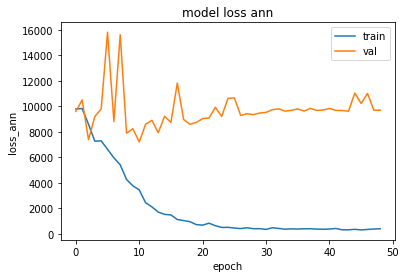

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('model loss ann')
plt.ylabel('loss_ann')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig('loss_ann.png')


Loading and running the saved model for ANN

In [23]:
# importing the libraries to perform load and evaluate the saved model
from keras.models import load_model

In [24]:
# load model
# model1 = load_model("1106937_ANN.h5")
modelnew_ann = tf.keras.models.load_model('1106937_ANN.h5')

In [25]:
modelnew_ann.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 100)               250100    
_________________________________________________________________
layer1 (Dense)               (None, 75)                7575      
_________________________________________________________________
layer2 (Dense)               (None, 50)                3800      
_________________________________________________________________
layer3 (Dense)               (None, 25)                1275      
_________________________________________________________________
layer4 (Dense)               (None, 10)                260       
_________________________________________________________________
layer5 (Dense)               (None, 5)                 55        
_________________________________________________________________
layer6 (Dense)               (None, 1)                

In [26]:
# evaluate the loaded model and calculating the scores
scoresnew_ann = modelnew_ann.evaluate(scale_input_ann[test], data_target_ann[test], verbose=0)

In [27]:
# Printing the score
print(scoresnew_ann)

[9694.9453125, 77.79586791992188]


Coding for the **CNN model**

In [28]:
df1_cnn.shape

(1000, 2)

Reshaping the data matrix so that a CNN model can be built 

In [29]:
reshapecnn = []
for i in range(1000):
  reshape_2dcnn = np.reshape(df1_cnn.header_data_cnn[i], (50, 50))
  reshapecnn.append(reshape_2dcnn)

cnn_ip = np.asarray(reshapecnn)

In [30]:
cnn_ip.shape

(1000, 50, 50)

In [31]:
# creating a split for train and test of 70:30 ratio for the dataset
x_train_cnn, x_test_cnn = train_test_split(cnn_ip, train_size = 0.7)
y_train_cnn, y_test_cnn = train_test_split(df1_cnn.val_data_cnn, train_size = 0.7)

In [32]:
# Scaling the dataset using MinMaxScaler
data_scaling_cnn = MinMaxScaler()
scale_input_cnn = data_scaling_cnn.fit_transform(l1_cnn,2500)
scale_input_cnn

array([[0.27753814, 0.98568715, 0.54455477, ..., 0.51442389, 0.58091678,
        0.05583596],
       [0.13465061, 0.05616399, 0.53276068, ..., 0.27997605, 1.        ,
        0.42643034],
       [0.09816313, 0.78265626, 0.28502689, ..., 0.43488515, 0.33188076,
        0.78473294],
       ...,
       [0.66626438, 0.79522118, 0.19306748, ..., 0.2499735 , 0.61852049,
        0.89682918],
       [0.60979571, 0.97810167, 0.43778212, ..., 0.27984237, 0.61781701,
        0.85678197],
       [0.93058284, 0.31627963, 0.13169842, ..., 0.88304912, 0.14369493,
        0.60778616]])

In [33]:
scale_input_cnn = np.concatenate((x_train_cnn, x_test_cnn), axis=0)
data_target_cnn = np.concatenate((y_train_cnn, y_test_cnn), axis=0)

In [34]:
print("CNN Model")
print("Input Shape:", scale_input_cnn.shape)
print("Traget Shape:", data_target_cnn.shape)

CNN Model
Input Shape: (1000, 50, 50)
Traget Shape: (1000,)


In [35]:
k_fold_acc_cnn = []
k_fold_loss_cnn = []

Importing the necessary libraries to create and compile the CNN model

In [36]:
from tensorflow.keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D

In [37]:
# Training the CNN model for the respective k folds (9)
for train, test in fk.split(scale_input_cnn, data_target_cnn):
  model_cnn = keras.Sequential()
    
  model_cnn.add(layers.Conv1D(100,5, input_shape = (50,50), activation='relu', name = "layer1"))
  model_cnn.add(layers.BatchNormalization(name = "layer2"))
  model_cnn.add(layers.MaxPool1D(pool_size=5, name = "layer3"))
  model_cnn.add(layers.Conv1D(75,5, activation='relu', name = "layer4"))
  model_cnn.add(layers.BatchNormalization(name = "layer5"))
  model_cnn.add(layers.Dropout(0.5, name = "layer6"))
  model_cnn.add(layers.MaxPool1D(pool_size=5, name = "layer7"))
  # model_cnn.add(layers.Conv1D(50,1, activation='relu', name = "layer7"))
  # model_cnn.add(layers.BatchNormalization(name = "layer8"))
  model_cnn.add(layers.Flatten(name = "layer8"))
  model_cnn.add(layers.Dense(1, activation='linear', name = "layer9"))

  model_cnn.summary()
  
  #compiling model with adam as the optimizer, mean square error as the loss function and mean absolute error as the metric
  model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
  
  history_cnn = model_cnn.fit(scale_input_cnn[train], data_target_cnn[train],
                batch_size=1,epochs=50,verbose=1, validation_data = (scale_input_cnn[test],data_target_cnn[test]))
  
  model_cnn.save('1106937_CNN.h5')
  
  scores_cnn = model_cnn.evaluate(scale_input_cnn[test], data_target_cnn[test], verbose=0)
  
  k_fold_acc_cnn.append(scores_cnn[1] * 100)
  k_fold_loss_cnn.append(scores_cnn[0])
  print(scores_cnn)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv1D)              (None, 46, 100)           25100     
_________________________________________________________________
layer2 (BatchNormalization)  (None, 46, 100)           400       
_________________________________________________________________
layer3 (MaxPooling1D)        (None, 9, 100)            0         
_________________________________________________________________
layer4 (Conv1D)              (None, 5, 75)             37575     
_________________________________________________________________
layer5 (BatchNormalization)  (None, 5, 75)             300       
_________________________________________________________________
layer6 (Dropout)             (None, 5, 75)             0         
_________________________________________________________________
layer7 (MaxPooling1D)        (None, 1, 75)            

Printing the Loss Score 

In [38]:
print('-----------------------------CNN------------------------------------------')
print('Score per fold for cnn')
for i in range(0, len(k_fold_acc_cnn)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {k_fold_loss_cnn[i]} - Accuracy: {k_fold_acc_cnn[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds for cnn:')
print(f'> Accuracy: {np.mean(k_fold_acc_cnn)} (+- {np.std(k_fold_acc_cnn)})')
print(f'> Loss: {np.mean(k_fold_loss_cnn)}')
print('------------------------------------------------------------------------')

-----------------------------CNN------------------------------------------
Score per fold for cnn
------------------------------------------------------------------------
> Fold 1 - Loss: 88762.390625 - Accuracy: 28421.267700195312
------------------------------------------------------------------------
> Fold 2 - Loss: 30553.345703125 - Accuracy: 14929.47998046875
------------------------------------------------------------------------
> Fold 3 - Loss: 953468.3125 - Accuracy: 97167.4072265625
------------------------------------------------------------------------
> Fold 4 - Loss: 30163.19140625 - Accuracy: 14827.05078125
------------------------------------------------------------------------
> Fold 5 - Loss: 321993.875 - Accuracy: 55818.359375
------------------------------------------------------------------------
> Fold 6 - Loss: 57191.4765625 - Accuracy: 22351.834106445312
------------------------------------------------------------------------
> Fold 7 - Loss: 739852.0 - Accurac

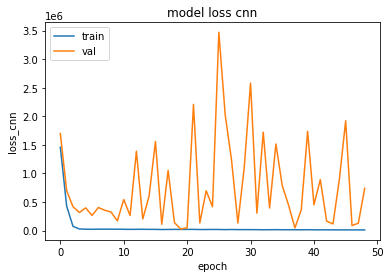

<Figure size 432x288 with 0 Axes>

In [40]:
#Graph for CNN model's loss (Validation loss and training loss)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss cnn')
plt.ylabel('loss_cnn')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('loss_cnn.png')

Loading the CNN model and evaluating the results

In [41]:
# load model

modelnew_cnn = tf.keras.models.load_model('1106937_CNN.h5')

In [42]:
modelnew_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv1D)              (None, 46, 100)           25100     
_________________________________________________________________
layer2 (BatchNormalization)  (None, 46, 100)           400       
_________________________________________________________________
layer3 (MaxPooling1D)        (None, 9, 100)            0         
_________________________________________________________________
layer4 (Conv1D)              (None, 5, 75)             37575     
_________________________________________________________________
layer5 (BatchNormalization)  (None, 5, 75)             300       
_________________________________________________________________
layer6 (Dropout)             (None, 5, 75)             0         
_________________________________________________________________
layer7 (MaxPooling1D)        (None, 1, 75)           

In [43]:
scoresnew_cnn = modelnew_cnn.evaluate(scale_input_cnn[test], data_target_cnn[test], verbose=0)

In [44]:
# Printing the values
print(scoresnew_cnn)

[739852.0, 853.1119995117188]


***Quetion 5***
Creating the graph for the performance difference between Loss for ANN and CNN model

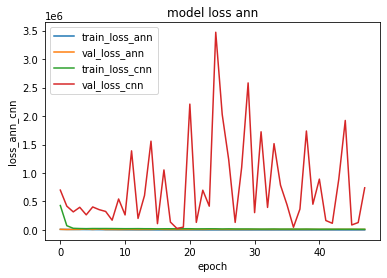

<Figure size 432x288 with 0 Axes>

In [49]:
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss ann')
plt.ylabel('loss_ann_cnn')
plt.xlabel('epoch')
plt.legend(['train_loss_ann', 'val_loss_ann','train_loss_cnn', 'val_loss_cnn'], loc='upper left')
plt.show()
plt.savefig('loss_comparison.png')


From the above graph we can see that CNN loss is varying when compared to ANN. The below comparison is with all the values calculated by its mean for both ANN and CNN. For all values, CNN shows a higher loss value. Comparing the results of ANN and CNN, we can conclude that CNN is better.

In [46]:
mae_ann = np.mean(history_ann.history['mae'])
val_mae_ann = np.mean(history_ann.history['val_mae'])
mae_cnn = np.mean(history_cnn.history['mae'])
val_mae_cnn = np.mean(history_cnn.history['val_mae'])
loss_ann = np.mean(history_ann.history['loss'])
val_loss_ann = np.mean(history_ann.history['val_loss'])
loss_cnn = np.mean(history_cnn.history['mae'])
val_loss_cnn = np.mean(history_cnn.history['val_loss'])

In [47]:
print(f'> mae ANN: {mae_ann}')
print(f'> Val mae ANN: {val_mae_ann}')
print(f'> mae CNN: {mae_cnn}')
print(f'> Val mae CNN: {val_mae_cnn}')
print(f'> Loss ANN: {loss_ann}')
print(f'> Val Loss ANN: {val_loss_ann}')
print(f'> Loss CNN: {loss_cnn}')
print(f'> Val Loss CNN: {val_loss_cnn}')
print(f'> Loss ANN: {np.mean(k_fold_loss_ann)}')
print(f'> Loss CNN: {np.mean(k_fold_loss_cnn)}')

> mae ANN: 33.86211605072022
> Val mae ANN: 78.29010833740234
> mae CNN: 172.79733032226562
> Val mae CNN: 772.7428283691406
> Loss ANN: 1993.9657318738043
> Val Loss ANN: 9698.657346141581
> Loss CNN: 172.79733032226562
> Val Loss CNN: 769589.9119100765
> Loss ANN: 11468.08189174107
> Loss CNN: 317426.3702566964
